## CLASSIFICATION: UNCLASSIFIED

# Visualizing Dataframes with Seaborn

So you would like to look at your data? Pandas handily comes with plotting abilities so you can quickly and easily do basic visualizations directly with pandas. If you want to explore a little more, and construct more interesting statistical visualizations then seaborn is the package to use -- it provides high quality statistical plotting out of the box. It also has features for dealing with categorical and ordinal data, so if you have a dataframe that isn't purely numeric then seaborn is a good approach. In this notebook we'll quickly run through some of the things that seaborn can do for you. All of the datasets used in this notebook are [available here](https://git.cse-cst.gc.ca/projects/DM/repos/notebooks/browse/Data%20Exploration%20and%20Visualization). 

First we'll load the ncessary libraries: pandas and numpy, obviously, and scipy stats for some of the statistical functions. Next we'll load seaborn as sns (this is traditional, as per the seaborn docs; seaborn is named after the character Sam Norman Seaborn from the TV show 'The West Wing', hence the n). Finally we tell matplotlib that we'll be plotting inline (seaborn uses matplotlib as a backend) and tell seaborn that we want our plots in notebook context (this sets various style options; alternatives include, 'paper', 'talk', and 'poster').

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

%matplotlib inline
sns.set_context('notebook')

## Plotting distributions

The first thing that seaborn can help you with is understanding the distribution of your data. As a simple test example let's generate an array of 100 data points sampled from a Normal distribution. You can imagine that this might be the data for one of your numeric features is a dataframe.

In [2]:
data = np.random.normal(size=100)

Seaborn has a simple to use function called ``distplot`` that lets you quickly and easily look at the distribution of an array of numeric data. We can see it at work below:

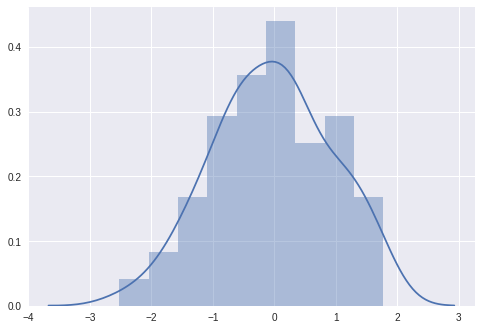

In [3]:
sns.distplot(data)

There are a lot of options for displot, and they are worth exploring eventually. Just to give you a taste we'll look at a couple. The first is the ability to trivially add a "rug plot" which adds a marker for each occurence of a data point. This can help you see the *actual* distribution of your data as presented by the ``distplot``.

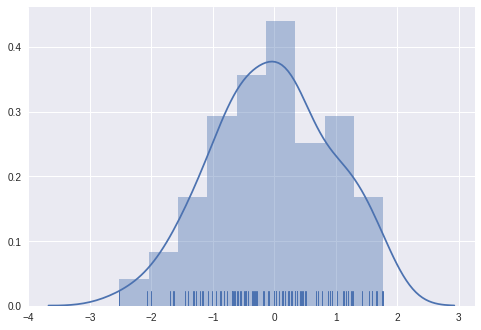

In [4]:
sns.distplot(data, rug=True)

As well as plotting the KDE (essentially a smoothed histogram) you can get histplot to fit actual known distributions to your data. In this case we know our data was drawn from a normal distribution, but we can see what a gamma distribution fit would look like over this data. There are plenty more distributions available in ``scipy.stats`` as well.

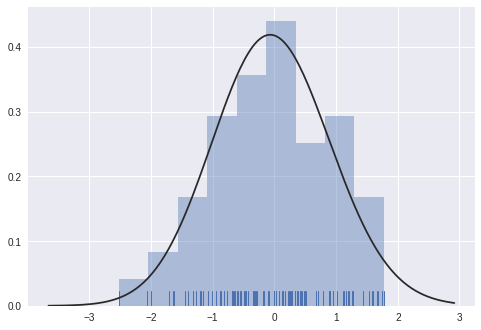

In [5]:
sns.distplot(data, kde=False, rug=True, fit=stats.gamma)

In practice you may have a couple of numeric features that you suspect may be inter-related. We can generate some data to fake that. The question now is how do you look at the combined distribution? Seaborn comes with a ``joinplot`` function for looking at pairwise distributions. This can be a powerful way to quickly get a feel for the distribution on interacting features.

In [6]:
data = np.random.multivariate_normal(mean=[0,1], cov=[(1, 0.25),(0.25, 1)], size=200)
df = pd.DataFrame(data, columns=('x', 'y'))

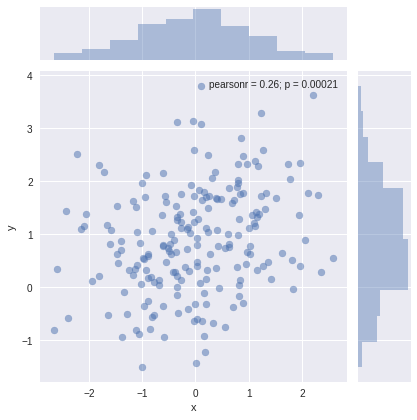

In [7]:
sns.jointplot(x='x', y='y', data=df, alpha=0.5)

By default we get a scatterplot of the data, but we are not limited to that. We can also get a hexbin plot, or a KDE (smoothed histogram) using the ``kind`` keyword argument.

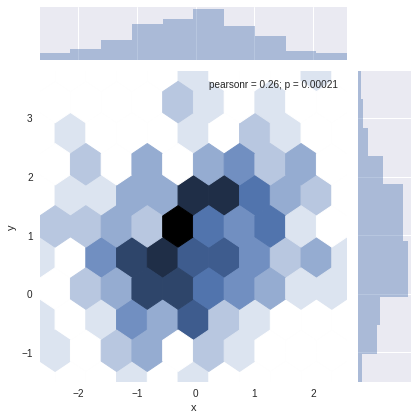

In [8]:
sns.jointplot(x='x', y='y', data=df, kind='hex')

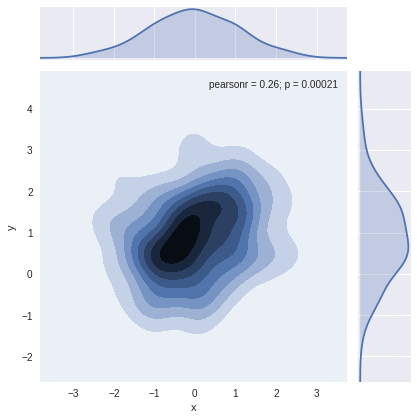

In [9]:
sns.jointplot(x='x', y='y', data=df, kind='kde')

## Categorical variables

Not all data is nice and numeric. Often you have features that simply fall into catgeories (often with text labels). As an example of this we'll load up the tips data set. As you can see from the sample of the dataframe we have some numeric data (the total bill, and the tip amount), but we also have a lot of features that are just text labels -- which day of the week was it; was it lunch of dinner time; and so on. We would like to be able to visualize this data and still make use of those catgeorical features. Seaborn has a number of tools to help.

In [10]:
import get_data
get_data.get_file("tips.csv", "../data/")
tips = pd.read_csv('../data/tips.csv')

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The first approach is ``swarmplot`` which is a kind of categorical scatterplot. As long as we have at least one numeric feature to compare against this will serve us well. Also of note is that ``swarmplot`` works directly with dataframes with an API that will become familiar as we work through many examples.

To get data into ``swarmplot`` you need to pass a dataframe into the ``data`` keyword argument, so in this case we pass in the dataframe ``tips``. To actually plot anything you need to specify the features to plot on the x and y axes. You can do this by providing *the names of the columns in the dataframe* that you wish to use. Thus to plot the total bill on the y-axis, separated by which day of the week it was on the x-axis we can do the following.

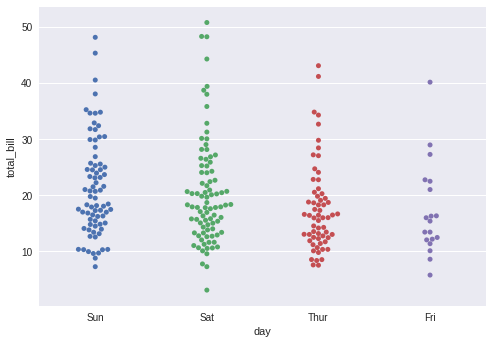

In [12]:
sns.swarmplot(x='day', y='total_bill', data=tips)

Note that seaborn was clever and took care of all the axis labelling for us automatically -- this was part of the benefit of using a dataframe, which contains all that relevant information.

Providing features for x and y was useuful, but we have more catgeorical features than that. Fortunately we can also specify the ``hue`` and seaborn will color accoding to that feature (be warned, try not to use features that have too many different values for hue!). Again, seaborn takes care of the busy work of labelling and creating legend for us, with very little work we get a presentation ready statistical plot.

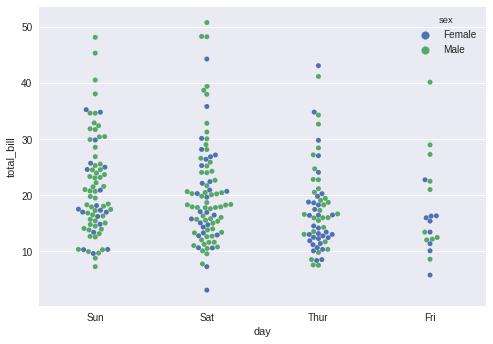

In [13]:
sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips)

Another option that seaborn provides is the so called ``violinplot`` which shows a smoothed representation of the distribution of data. You can see the violinplot version of the same thing we were looking at with swarmplot below. As before we provide a dataframe to the data keyword argument, and then specify x and y as column names from the dataframe.

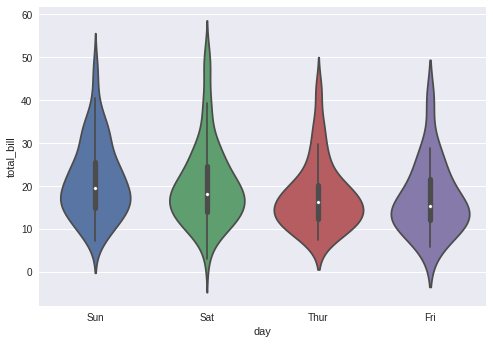

In [14]:
sns.violinplot(x='day', y='total_bill', data=tips)

Presumably then we can also specify a ``hue``? why of course we can. In general seaborn will plot several side-by-side violins of differing hues, but since we are picking a categtorical that only has two values we can take advantage of the ``split=True`` option which will display the categories as either side of each violin. If you have True/False categories these are a good candidate for hue using ``split=True`` in violinplots.

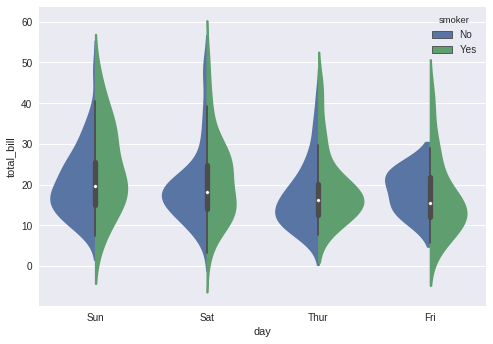

In [15]:
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, split=True)

Of course we can combine all of these together with a little extra styling.

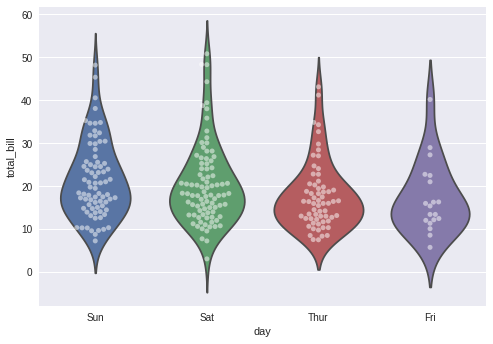

In [16]:
sns.violinplot(x='day', y='total_bill', data=tips, inner=None)
sns.swarmplot(x='day', y='total_bill', data=tips, color='white', alpha=0.5)

To look at some of the other plot types we'll load a different dataset; this one features data on passengers on the Titanic. As you can see we again have a lot of categorical data; some binary, some ordered, and some simply named categories (such as ``embark_town``).

In [17]:
get_data.get_file("titanic.csv", "../data/")
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


A ``barplot`` allows you to summarize numeric data and break that summary down according to categories. The default summary statistic is the mean (which we will use here) but any function that produces a single value given a numeric array will suffice -- you can pass such a function in to the ``estimator`` keyword. Here we will use the mean as applied to the binary (numeric) feature ``survived``. This will give us the survival rate. Just aqs before we pass in a dataframe to the ``data`` keyword, and then specify which features to place on the x or y axes, and, if we wish, a hue argument to further break things down. Thus we can quickly and easily see the average survival rate of passengers based on where they embarked from, and which class they were in. 

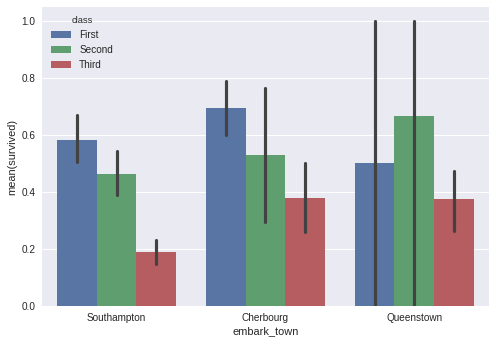

In [18]:
sns.barplot(x='embark_town', y='survived', hue='class', data=titanic, hue_order=['First', 'Second', 'Third'])

It is worth noting that aside from doing the stats and getting all the labelling and legends for us, seaborn also added confidence-bounds/error-estimates as black bars. Seaborn will do this regardless of the estimator function you provide by using bootstrap confidence intervals (you don't need to know what they, merely that they will provide confidence bounds for you). You can probably also see that we have little or no certainty of survival rates for passengers who embarked from Queenstown. To see why we can use another, similar, type of plot ``countplot``. This is similar to the bar plot, but rather than summarizing a numeric variable it simply counts the number of occurences in the dataset of observations that meet the criteria given. Thus we can ask for a breakdown of the count of passengers (each passenger is an observation) by the town of embarkation and which deck they were on (for example). Just like everything else ``countplot`` takes a dataframe for the ``data`` keyword. This time, however, we do not need to provide a y value since that is simply the count of the number of observations in a category.

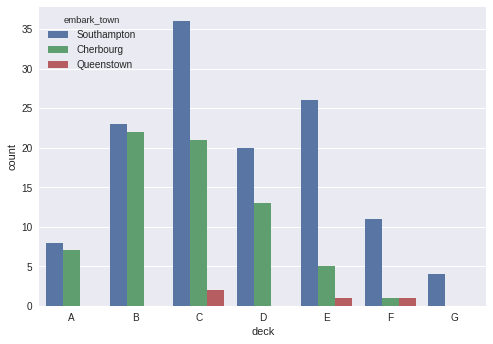

In [19]:
sns.countplot(x='deck', hue='embark_town', data=titanic, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

We see that very few pasengers embarked from Queenstown, and that explains our uncertainty in survival rates: with very few data points there is quite a large variance on what the true survival rate might be.

Finally we have one more plot that combines all the things we've learned so far, the ``factorplot``. The ``factorplot`` function is a high level interface over all the various plot described so far, but allows you to "facet" by different categorical variables as well. What does that mean? It means we can create subplots based on category. Just as before we supply a dataframe as ``data`` and can then specify x, y and hue as we wish. We have the added options, however, of ``row`` and ``col``. In the case below we will set ``col`` to be time of day. That means that factorplot will split the data out and create a separate plot for each time of day, one in each column. The ``row`` option does exactly as you expect, and you can even provide both ``row`` and ``col`` to create a grid of plots. The ``kind`` keyword allows you to select a kind of plot, which can be any of those we've see so far: ``swarm``, ``violin``, ``bar``, or ``count``. 

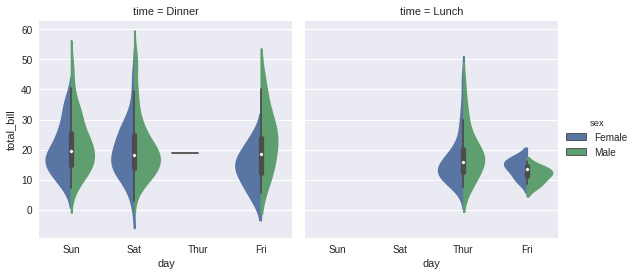

In [20]:
sns.factorplot(x='day', y='total_bill', hue='sex', col='time', data=tips, kind='violin', split=True)

It is very quick and easy to put together interesting plots in this way, slicing and dicing you data by different factors. For example we could look at titanic data and consider survival rate broken down by deck, age, sex and class. Really you can let your imagination go wild at this point.

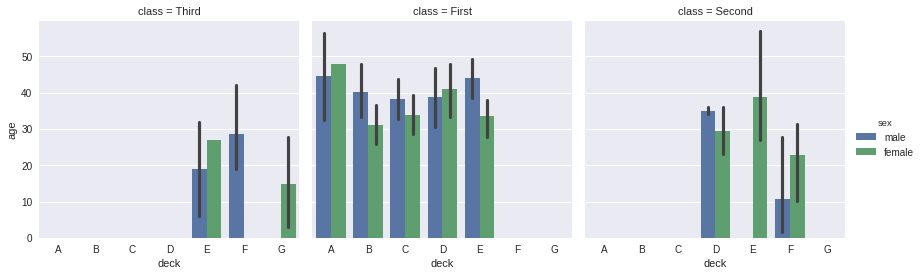

In [21]:
sns.factorplot(x='deck', y='age', hue='sex', col='class', data=titanic, kind='bar',
               row_order=['First', 'Second', 'Third'], order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

## Relationships between features

Exploring relationships between features can provide useful insights about your data. Seaborn provides a number of tools to make this easy. The most straightforward is ``regplot`` which will perform a regression fit on your data and plot the results for you. The default is a linear fit, but regplot comes with a number of options to support more interesting regressions. The first is ``order`` which allows you to fit higher order terms (``order=2`` provides a quadratic fit for example); other options include ``robust=True`` which uses robust linear models (which are robust to outliers), ``lowess=True`` which performs a locally linear fit, and ``logistic=True`` which performs a logistic regression (where the response or y variable is a boolean True/False condition).

As with other seaborn plots we pass in a dataframe via the ``data`` keyword, and then specify the names of the columsn for the x and y. For example we can look at the relationship between total bill and tip amount in the tips dataset.

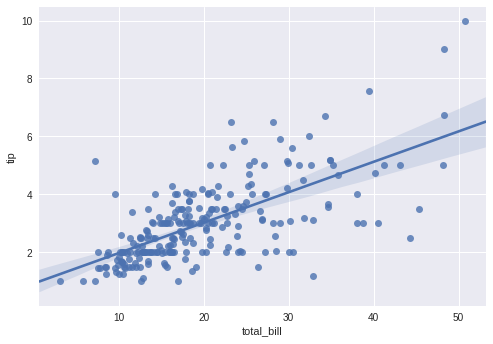

In [22]:
sns.regplot(x='total_bill', y='tip', data=tips)

A closely related function is ``lmplot``. It's basic arguments are all the same as regplot, and as you can see below the results are almost identical.

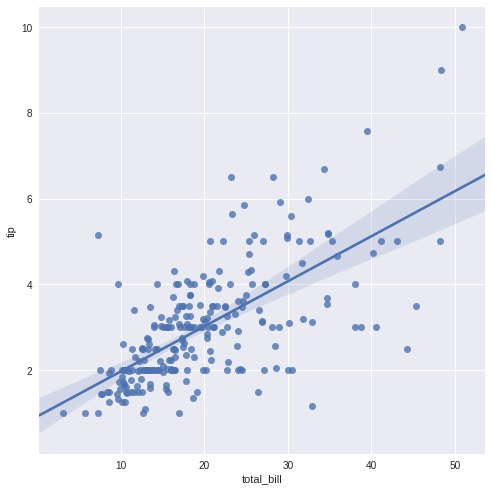

In [23]:
sns.lmplot(x='total_bill', y='tip', data=tips, size=7)

The benefit of ``lmplot`` is that, like factorplot, it takes extra arguments, such as ``hue`` and does the sensible thing. For example, while there is clearly a (rough) linear relationship of tip to total bill, does that vary as to whether the diner is a smoker or not? By simply adding ``hue='smoker'`` we can get seaborn to seprate the data based on the categories in the ``smoker`` column of the dataframe and perform seprate regressions for each of them, plotting the results nicely with suitable legends as desired.

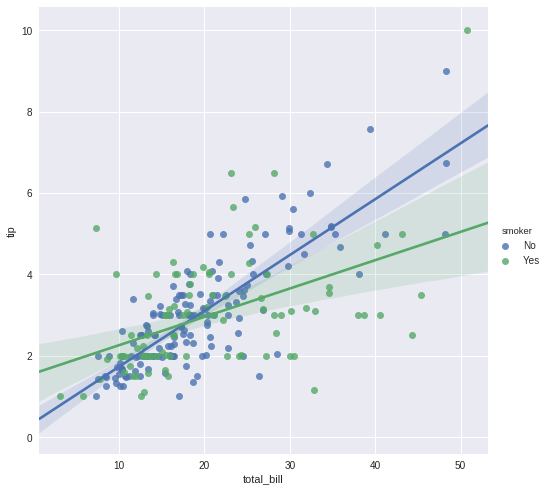

In [24]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, size=7)

What's more, just like factorplot we not only have ``hue`` but also ``row`` and ``col`` to further break down the data by, allowing is to easily look at how relationship between numerical features vary according to different categorical features. For example Anscombe's quartet is a dataset that can be partitioned into 4 groups, each of which shows a regression with the same slope and same correlation coefficient. We can load it as one dataset with a categtorical column defining which of the four partitions a given obvservation is in. We can then use the ``col`` argument with ``lmplot`` to plot the four different regressions easily. 

In [25]:
get_data.get_file("anscombe.csv", "../data/")
anscombe = pd.read_csv('../data/anscombe.csv')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


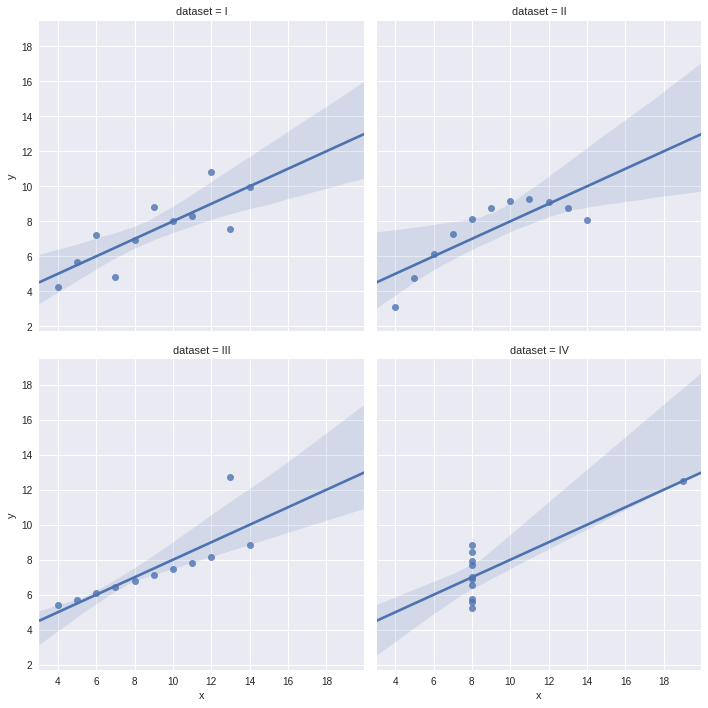

In [26]:
sns.lmplot(x='x', y='y', col='dataset', data=anscombe, col_wrap=2)

Regression also works for ordinal  data -- data that is in ordered categories. When visualising this it is potentially useful to add some jitter to points, otherwise it can be hard to see with points all plotting one atop another.

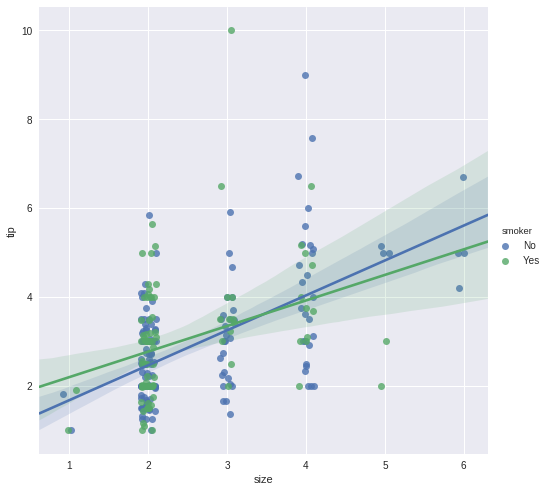

In [27]:
sns.lmplot(x='size', y='tip', hue='smoker', data=tips, x_jitter=0.1, size=7)

A better option still is to use an estimator. In this case we can use ``x_estimator=np.mean`` to take the mean value (with bootstrapped confidence bounds) at each x value. Just like the ``estimator`` from ``barplot`` any function will do, but generally speaking the mean (or possibly the median) is the best approach.

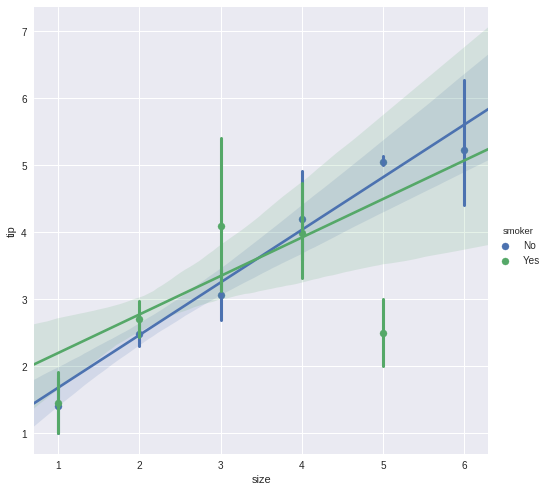

In [28]:
sns.lmplot(x='size', y='tip', hue='smoker', data=tips, x_estimator=np.mean, size=7)

Beyond just looking at linear relationships, if we have data that has a number of numerical features we can look at *all* the pairwise relationships between those features easily. To show how this works we'll load a different dataset called iris. This data set has 150 observations of the lengths and widths of sepals and petals of three different species of iris.

In [29]:
get_data.get_file("iris.csv", "../data/")
iris = pd.read_csv('../data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


To look at pairwise relationships between numeric columns we simply call ``pairplot`` and let it do all the heavy lifting.

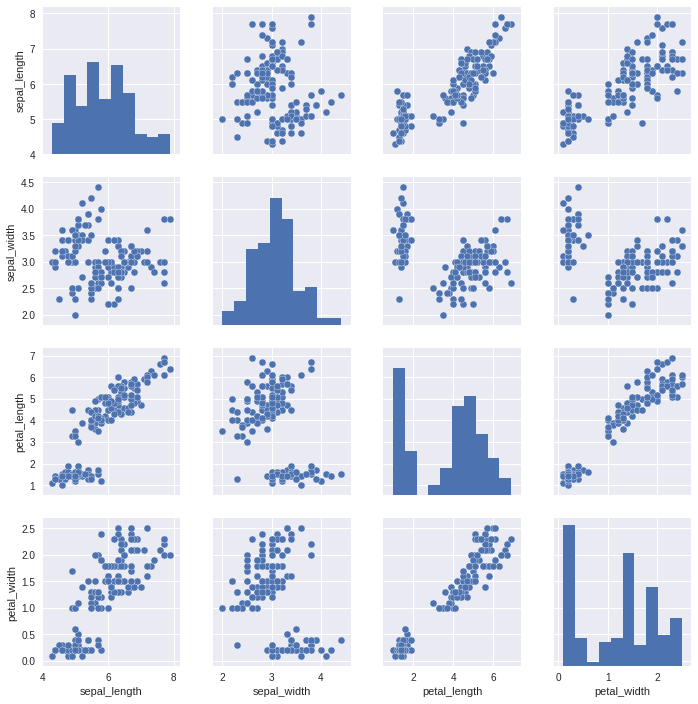

In [30]:
sns.pairplot(iris)

The result is a grid of scatterplots of all the different pairwise relationships. By default down the diagonal ``pairplot`` will generate a histogram of the relevant feature. This provides an incredibly easy way to quickly visualize distributions and correlations between numeric features, all at a glance. It is worth noting that if you have *many* numeric features then this sort of plot will become too busy. You can use the ``vars`` (or ``x_vars`` and ``y_vars`` to specify the grid completely) to select which columns of the dataframe to actually plot.

Of course ``pairplot`` supports the same sort of API as many other seaborn functions. In particular we can specify a ``hue`` and have seaborn colour the different species for us. We can also specify different kinds of plot for the diagonal and off diagonal plots. We might want, for example, to have the smoothed histograms provided by KDE.

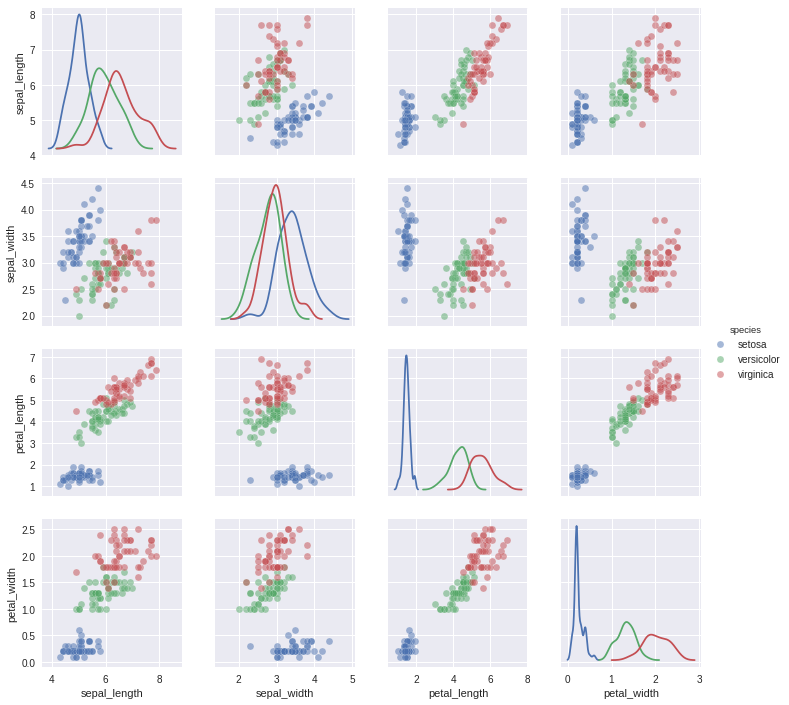

In [31]:
sns.pairplot(hue='species', data=iris, plot_kws=dict(alpha=0.5), diag_kind='kde')

For maximal control we can use the ``PairGrid`` class, which lets is map in seprate plot types on the diagonal and upper and lower portions of the grid. Here, for example, we'll do regressions on the lower plots, a distplot on the diagonal and residual plot (plotting the errors in a regression) on the upper portion. The possibilities are, of course, endless.

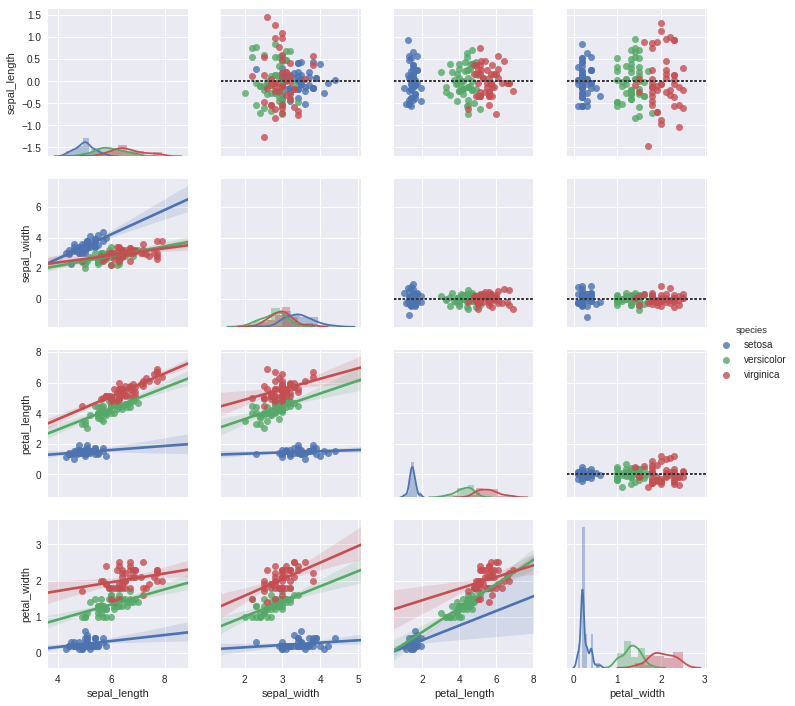

In [32]:
pair_grid = sns.PairGrid(iris, hue='species')
pair_grid.map_diag(sns.distplot)
pair_grid.map_lower(sns.regplot)
pair_grid.map_upper(sns.residplot)
pair_grid.add_legend()

Hopefully this gives you some flavour of your ability to explore relationships in the data. Keep in mind all of these functions have many more options than I've outlined here, so make use of the help for the individual functions!

## Clustermaps for data summaries

We'll cover off one final seaborn function -- the ability to create clustermaps of large matrices of numeric data. For this we'll load yet another dataset, this time one about brain networks. There is a lot of data here, and it is all numeric.

In [33]:
get_data.get_file("brain_networks.csv", "../data/")
networks = pd.read_csv('../data/brain_networks.csv', header=[0, 1, 2], index_col=0)
networks.head().T

0           1          2           3          4
network node hemi                                                          
1       1    lh     56.055744   55.547253  60.997768   18.514868  -2.527392
             rh     92.031036   43.690075  63.438793   12.657158 -63.104668
2       1    lh      3.391576  -65.495987 -51.108582  -34.576603 -13.814151
             rh     38.659683  -13.974523 -13.561346  -32.665958 -15.837989
3       1    lh     26.203819  -28.274963 -18.842947   -7.420454 -45.216927
             rh    -49.715569  -39.050129  -1.214659   17.119448   3.483550
4       1    lh     47.461037   -1.210660 -65.575806  -41.800869 -62.613335
             rh     26.746613  -19.012897 -85.777428  -58.610184 -49.076508
5       1    lh    -35.898861   19.568010  19.247454   32.896915  18.396759
             rh     -1.889181   15.902983  37.209419   11.199619   3.219077
6       1    lh      5.898688  -23.231823   2.392153  -14.665752 -41.856911
             rh    -43.692322  -10.745867  16.509109    2.073715 -24.690414
        2    lh    -47.664265   10.269546  -5.314236   32.634335 -33.975418
             rh     12.284122   31.275831   2.372976   45.825409 -24.149668
7       1    lh      1.566538  -26.309488  -7.342168  -47.632999  -6.315651
             rh    -13.042585  -18.077026 -24.550989   -6.580215 -29.344135
        2    lh     -1.855260  -10.259323   1.774612   -2.768599 -52.696259
             rh    -39.805901  -43.488678  32.257950  -25.282215 -41.713947
        3    lh    -30.831512  -63.965630  -1.835028  -14.930727 -13.849936
             rh    -61.137009   47.789856 -29.464401   10.123429 -58.447361
8       1    lh    -25.827856   -7.910675 -74.943153 -106.994080  23.605339
             rh     39.024162   37.951271 -15.261617  -21.723146  24.290478
        2    lh    -29.971645   -9.677254  25.806980  -20.490711  32.855915
             rh     -6.132372  -52.373508 -46.593338   11.527937 -19.030916
        3    lh    -56.756989    6.007476  25.265587  -68.262657  -2.603484
             rh      0.210136    9.637691   5.462775   -3.132030   1.421895
9       1    lh    -33.019844    7.855989  17.450323   17.405626  -6.299030
             rh      2.978493   -1.527979  15.149142   20.108774  10.706376
10      1    lh     -8.327313    6.175286  -8.669070   -7.765410 -12.581365
             rh     15.077152  -16.031374  -9.739176   -8.737942   8.727492
...                       ...         ...        ...         ...        ...
12      1    lh    -63.292145  -40.547058 -10.658049   13.992867  31.952026
             rh    -75.995117  -38.194012 -37.481701  -29.308743  51.827541
        2    lh    -35.445915  -56.608185 -48.848610  -14.997897  44.466385
             rh    -99.392723  -98.992615 -58.193855   15.300611  48.752403
        3    lh    -73.017418  -82.669670  -7.808380    1.789121  32.329876
13      1    lh    -18.968014  -64.506470 -53.985542  -41.107334 -18.740891
             rh     14.880836    4.348629 -21.308418  -17.331886 -10.787350
        2    lh    -47.754597  -84.354919 -64.170738  -40.612820  34.943150
             rh     14.738475   23.792282   8.968520   19.627728  55.853088
        3    rh    -16.853010    8.927007   1.413584   49.208748  46.737320
        4    rh    -34.217819  -19.732401  -4.955075    1.661293   4.586625
14      1    lh    -66.330696   25.679350  29.660667   58.214813  -5.739993
             rh     -5.723309   22.786358 -14.237561   11.480132   5.046614
15      1    lh    -32.081429  -13.500934  15.600105   38.754799  38.816483
             rh    -76.854546  -12.818995 -28.891750    6.445356  38.395302
16      1    lh     13.468185   58.723301  36.938549  -14.411023   3.145955
             rh     68.456291   73.054916  61.344879    1.167204  -2.231751
        2    lh     19.311008   72.225502  42.459984   42.532688  54.100559
             rh     30.178928   89.647049  33.834400    9.161954  61.578274
        3    lh     60.526405   73.124344  13.884751   21.521736  11.236470


If we want to know about correlations between these observations we can use the ``corr`` function from pandas to compute all pairs correlation coefficients. This will create a giant 62x62 matrix of values (we'll disply it below, but it won't fit on screen very well).

In [34]:
networks.corr()

network                   1                   2                   3            \
node                      1                   1                   1             
hemi                     lh        rh        lh        rh        lh        rh   
network node hemi                                                               
1       1    lh    1.000000  0.881516 -0.042699 -0.074437 -0.342849 -0.169498   
             rh    0.881516  1.000000  0.013073  0.033733 -0.351509 -0.162006   
2       1    lh   -0.042699  0.013073  1.000000  0.813394 -0.006940 -0.039375   
             rh   -0.074437  0.033733  0.813394  1.000000 -0.027324 -0.023608   
3       1    lh   -0.342849 -0.351509 -0.006940 -0.027324  1.000000  0.553183   
             rh   -0.169498 -0.162006 -0.039375 -0.023608  0.553183  1.000000   
4       1    lh   -0.373050 -0.333244 -0.019773 -0.017577  0.528787  0.302219   
             rh   -0.361726 -0.337476  0.007099 -0.014632  0.503403  0.354792   
5       1    lh    0.431619  0.431953 -0.147374 -0.173501 -0.157154 -0.101181   
             rh    0.418708  0.519916 -0.104164 -0.094717 -0.185008 -0.095232   
6       1    lh   -0.084634 -0.035720 -0.023796 -0.066213  0.177515  0.094462   
             rh   -0.031461  0.036814 -0.073049 -0.108345  0.171836  0.204074   
        2    lh   -0.077035 -0.049187 -0.127098 -0.170412  0.237037  0.160488   
             rh   -0.037950 -0.001363 -0.094409 -0.046182  0.194157  0.311982   
7       1    lh   -0.333648 -0.284145  0.030661  0.037597  0.234096  0.124309   
             rh   -0.288166 -0.247166  0.108992  0.119441  0.316944  0.287226   
        2    lh   -0.366065 -0.361036  0.139011  0.128550  0.360712  0.178005   
             rh   -0.325680 -0.274151  0.081624  0.070068  0.196449  0.193993   
        3    lh   -0.196770 -0.142392 -0.029201 -0.034760  0.071409  0.008877   
             rh   -0.144566 -0.070452 -0.021835 -0.037368  0.111786  0.009078   
8       1    lh   -0.366818 -0.358625  0.149822  0.166900  0.032874 -0.116502   
             rh   -0.388756 -0.402173  0.096974  0.123178 -0.046510 -0.155786   
        2    lh   -0.352529 -0.302286  0.030046  0.005026  0.057435  0.028074   
             rh   -0.363982 -0.339989  0.046601 -0.002802  0.017854 -0.119349   
        3    lh   -0.341524 -0.315931  0.106975  0.117894  0.094418  0.006474   
             rh   -0.350452 -0.343379  0.074870  0.105008 -0.015752 -0.094666   
9       1    lh   -0.071561 -0.112092 -0.204368 -0.193226  0.018500 -0.037311   
             rh   -0.051329 -0.057487 -0.188491 -0.134357 -0.070482 -0.131137   
10      1    lh   -0.122970 -0.137003 -0.078757 -0.045523  0.020065  0.048486   
             rh   -0.083401 -0.106933 -0.121606 -0.076322 -0.091292 -0.041439   
...                     ...       ...       ...       ...       ...       ...   
12      1    lh   -0.049793 -0.112697 -0.284837 -0.278937  0.006871 -0.012899   
             rh    0.026902 -0.036909 -0.242099 -0.263981 -0.154326 -0.154084   
        2    lh   -0.144335 -0.144277 -0.145417 -0.114873 -0.075809 -0.134092   
             rh   -0.141253 -0.189683  0.021735 -0.001352 -0.181104 -0.219954   
        3    lh    0.119250  0.084633 -0.164244 -0.126516 -0.124096 -0.061237   
13      1    lh   -0.261589 -0.324230 -0.158223 -0.116555 -0.006221 -0.082012   
             rh   -0.272701 -0.332886 -0.150474 -0.172868 -0.159675 -0.211583   
        2    lh   -0.370021 -0.374322 -0.139006 -0.078400 -0.074065 -0.100924   
             rh   -0.327967 -0.405959 -0.210455 -0.193444 -0.175281 -0.273650   
        3    rh   -0.327186 -0.396053 -0.132443 -0.126866 -0.259706 -0.273157   
        4    rh   -0.103326 -0.152463 -0.086895 -0.185291 -0.154715 -0.149883   
14      1    lh   -0.024661 -0.112679 -0.184090 -0.195448  0.104208  0.023949   
             rh   -0.012672 -0.056383 -0.065515 -0.057293 -0.035382 -0.082456   
15      1    lh   -0.044646 -0.012046 -0.015752 -0.020848 -0.040382 -0.074780   
             rh    0.008508  0.

Given a big matrix of numeric data, if we want to understand it better we can throw it to seaborns ``clustermap`` function. This will plot a heatmap of the matrix, but also perform hierarchical clustering on both the rows and the columns, sorting them so the closest matches are nearest, See below for an example:

/home/lmmcinn/.conda/envs/datascience3a/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


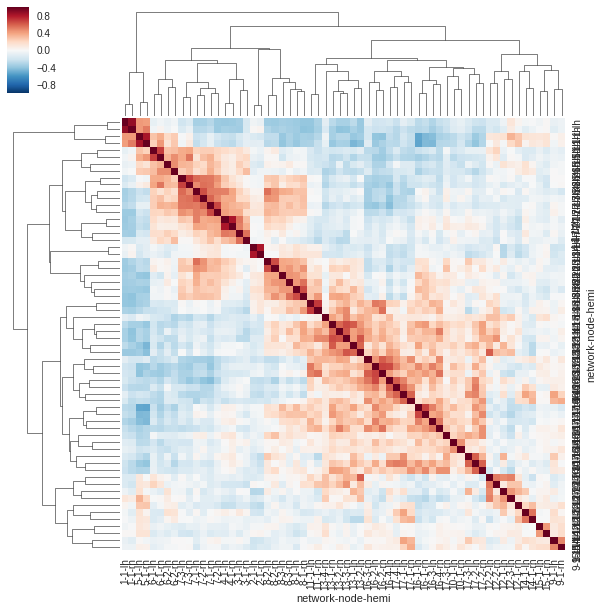

In [35]:
sns.clustermap(networks.corr())